----------
Deep Learning
-------------
Kerakli kutubxonalarni yuklab oldik

In [2]:
from fastai.vision.all import *
from ipywidgets import widgets

Kerakli datani yuklab olamiz, agar datamiz zip bo'lsa oldin uni ochadi keyin esa uni o'qiydi

In [3]:
path = untar_data(URLs.PETS) / 'images'

Labellovchi funksiya:
  Bunda X argumentining 1-hadi katta harf bilan boshlansa True, aks holda False qiymat qaytaradi

In [4]:
def is_Cat(X):
  return X[0].isupper()

data yuklovchi (dataloaders)

In [5]:
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid=0.2, seed=42,
    label_func=is_Cat, item_tfms=Resize(224)
)

O'qitish (train)

  train_loss, valid_loss -> bular modelni aniqligi, ya'ni 0 ga yaqin bo'lsa shuncha aniq ishlashidan dalolat beradi

  accuracy -> bu esa modelni aniqligini foizda ko'rsatib beradi.

  time -> esa bu modelni run qilish uchun ketgan vaqtni hisoblaydi

In [8]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(2)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 152MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.166565,0.024899,0.991881,00:52


epoch,train_loss,valid_loss,accuracy,time
0,0.065490,0.075389,0.979702,00:57
1,0.039527,0.016340,0.994587,00:54


Endigi navbat esa biz yaratgan modelimizni ishlatib ko'ramiz:

  Bu yerda hozir bitta tugma chiqadi, shu tugmani bosib xotiradan biror mushukni rasmlarini berib tekshirib ko'ramiz.

In [9]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Mushukmi : True
Aniqlilik ehtimolligi : 1.000


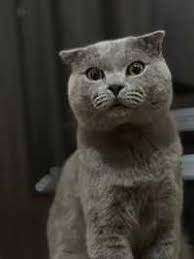

In [13]:
# rasmni o'zgaruvchiga saqlab olib uni consolga chiqaramiz
img = PILImage.create(upload.data[-1])

# Bashorat qilish (predict)
pred, _, prob = learn.predict(img)

print(f"Mushukmi : {pred}")
print(f"Aniqlilik ehtimolligi : {prob[1].item():.3f}")
img